# Исследование продаж компьютерных игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Даны данные до 2016 года. Представим, что сейчас декабрь 2016 г., и планируется кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируются ли продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

**Цель исследования**: выявить закономерности, определяющие закономерность игры.

### Файл и общая информация.

#### Добвляем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

#### Загружаем файл и изучаем информацию

In [2]:
data = pd.read_csv('/datasets/games.csv') 
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


По датафрейму видно, что название нужно подкоректировать (привести к нижнему регистру). На первый взгляд отсутствуют значения в столбцах в рейтингом и оценками. Это может быть связано с тем, что оценок недостаточно (игра не такая популярная), возможно техническая ошибка при выгрузке данных. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Столбец year_of_release можно привести к значению int, если нет пропусков. Если есть, то обратать и так же привести. Также странным выглядит, что user_score привиден к типу данных object, нужно будет обратить внимание на это в будущем. Не все значения есть в первых десяти строках.

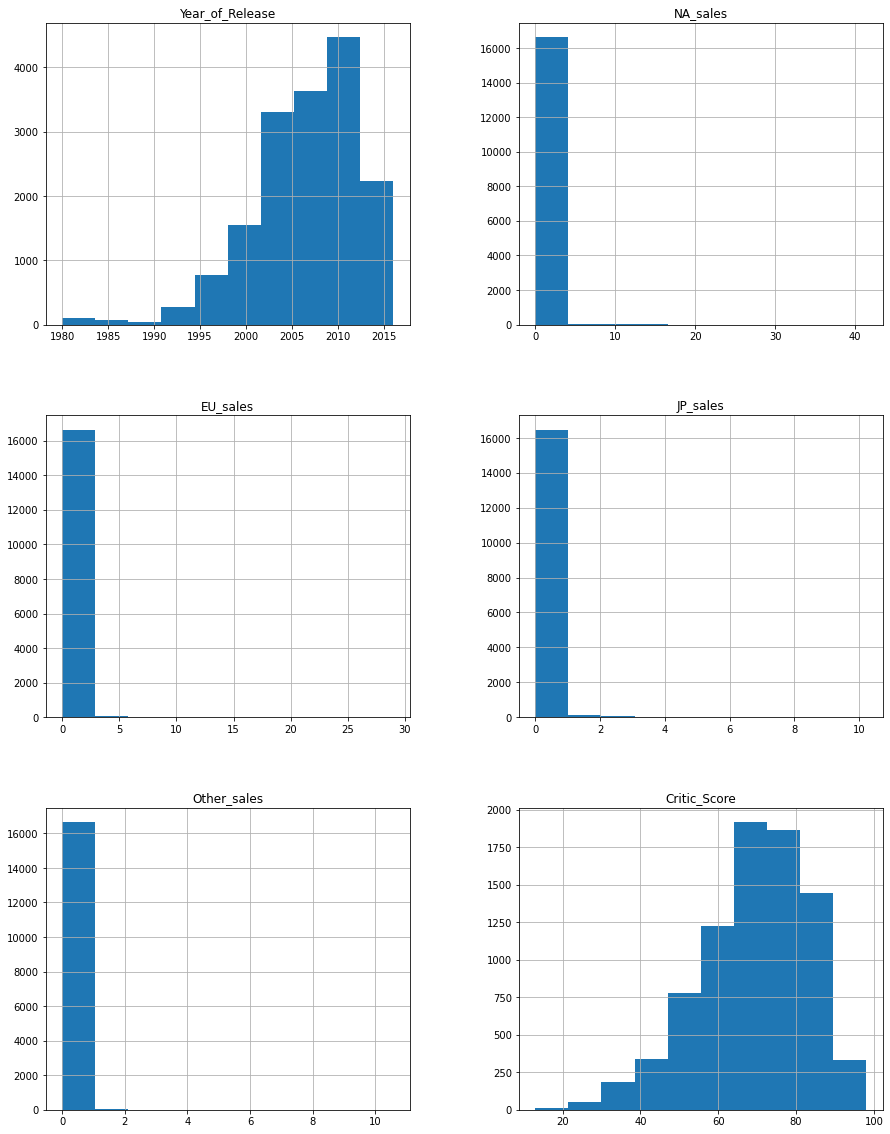

In [4]:
data.hist(figsize=(15, 20));

По гистограмме year_of_release видно, что хороший рост выпуска игр для платформ пошел с 1995 года, своего пика достиг в 2008-2009 годах, а затем пошел на спад. Возможно, это связано с быстрым развитием мобильных игр в то время.

Критики чаще всего ставят оценки от 60 до 80. Реже от 30 до 60 и от 80 до 100. Ниже 30 и около 100 их доля совсем небольшая.

Продажи по всем регионам и другим странам распределились практически одним столбцом в начале гистограммы. Трудно делать определенные выводы по этим графикам.

**Вывод:** данные по первому впечатлению представлены неплохо. Есть небольшие недочеты, связанные с названием столбцов и типами данных некоторых столбцов. Их надо будет учесть в предобработке.

### Предобработка данных

#### Заменим названия столбцов

In [5]:
data.columns = [i.lower() for i in data.columns]

In [6]:
data.head() #проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Найдем и изучим пропущенные значения в столбцах

In [7]:
data.duplicated().sum() #явные дубликаты отсутствуют

0

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [10]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


* year_of_release пропусков немного, но они все-таки могут исказить результаты, поэтому их лучше исключить;
* две строки, где отсутсвуют данные об имени игры, жанре и рейтинге можно удалить. У них маленькие продажи и это в дальнейшем никак не повлияет на ход исследования;
* пропуски в оценках и рейтинге можно оставить, так как их большое количесвто. Также невозможно подобрать средние или медиану, которая была бы схожа с реальным значением. Даже если брать по жанру или платформе, значения рейтига и оценок могут сильно отличаться в зависимости от игры;
* аббревиатура tbd означает to be determined (будет определено). Значит на данный оценка пользователей неизвестна, и можно поменять значение tdb на NaN;
* пропуски в рейтингах игры можно заполнить значением "Indef" (неопределенный), так будет легче строить выводы о данных значениях и они не будут упущены.

In [11]:
data = data.query('year_of_release.notna()')
data = data.drop([659, 14244]).reset_index(drop=True)
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['rating'] = data['rating'].replace(np.NaN, 'Indef')

In [12]:
data.query('index == 659') #проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Madden NFL 08,X360,2007.0,Sports,2.18,0.01,0.0,0.18,85.0,6.4,E


In [13]:
data.query('name.isna()') #проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [14]:
data.query('user_score == "tbd"') #проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [15]:
data.isna().sum() #проверка

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

#### Преобразуем данные в нужные типы

* year_of_release: float --> int (все года указаны в целых числах)
* user_score: object --> float (заменили аббревиатуру tbd на NaN, значения в int либо float)

In [16]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = pd.to_numeric(data['user_score'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Посчитаем суммарные продажи во всех регионах

In [18]:
data['general_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [19]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Indef,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Indef,31.38


**Вывод:** были учтены замечания из предыдущего пункта: названия столбцов приведены к нижнему регистру, изменен тип данных столбцов year_of_release, user_score. В последнем столбце обнаружена аббревиатура tbd означает to be determined (будет определено). Значит на данный оценка пользователей неизвестна, и можно поменять значение tdb на NaN. Явных дубликатов нет. Отдельно посчитано продажи по всему миру для дальнейшего исследования. 

### Исследовательский анализ данных

#### Количество игр в разные года

In [20]:
games_for_years = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
games_for_years.columns = ['count']
games_for_years

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


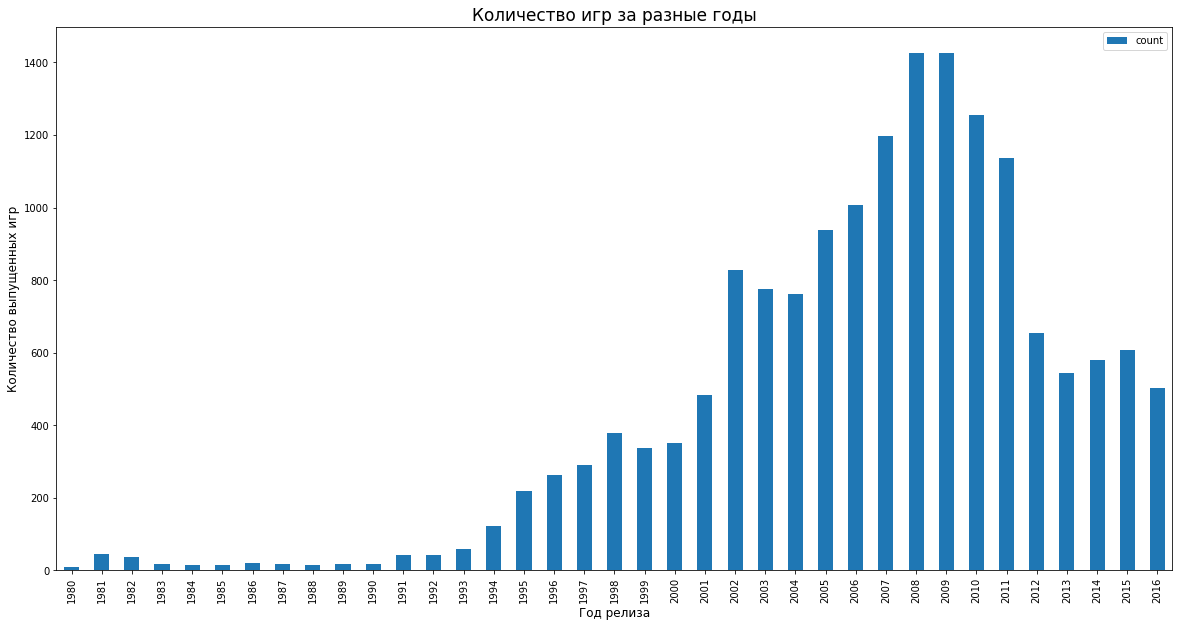

In [21]:
games_for_years.plot(use_index=True , y='count', kind='bar', figsize=(20,10))

plt.title('Количество игр за разные годы', size=17)
plt.xlabel('Год релиза', size=12)
plt.ylabel('Количество выпущенных игр', size=12)

plt.show()

По графику видно, что большой скачок в количестве игр произошел в 2002 году (около 829 игр, выпущенных за год). Это может обосновываться тем, что в это время начало бычтро развиваться ПК индустрия и игровые платформы, они начали появляться у большого количества людей. 

Спад идет в 2012 году. Скорее всего это связано с развитием мобильных приложений и игр, которые начали приходить на замену немобильным устройствам. 

Данные для дальнейшего исследования можно взять с 2011 года, в это время начали появляться мобильные игры, кототрые сильно повлияли на индустрию и игровые приставки, которые еще будут актуальны следущие несколько лет. 

#### Топовые платформы за все время

In [22]:
top_platforms = pd.pivot_table(data, index='platform', values='general_sales', aggfunc='sum').sort_values('general_sales', ascending=False).head()
top_platforms

,general_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Топ 5 платформ с 1980 года это PS2, Xbox 360, PS3, Wii, DS.

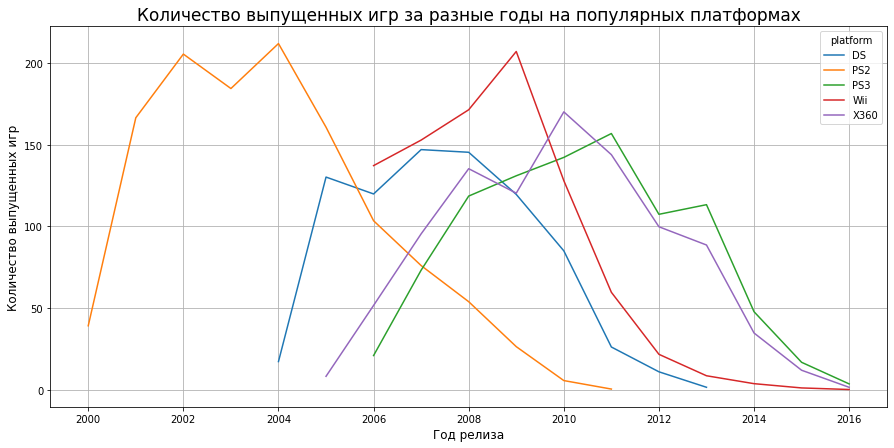

In [23]:
data_with_actual_platform = data.query('platform in ["PS2", "X360", "PS3", "DS", "Wii"] and 2000 <= year_of_release')
data_with_actual_platform.pivot_table(index='year_of_release', columns = 'platform', values='general_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))

plt.title('Количество выпущенных игр за разные годы на популярных платформах', size=17)
plt.xlabel('Год релиза', size=12)
plt.ylabel('Количество выпущенных игр', size=12)

plt.show()

Средняя продолжительность жизни платформы 5-6 лет. За это время она успевает устареть и ей на смену приходит новое поколение. 

#### Топовые платформы за актуальный период

In [24]:
data = data.query("2011 <= year_of_release <= 2016") #оставляем данные за 2011-2016 года

top_platforms_2011 = pd.pivot_table(data, index='platform', values='general_sales', aggfunc='sum').sort_values('general_sales', ascending=False).head()
top_platforms_2011

,general_sales
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32


Топ 5 платформ, начиная с 2011 года, составляют PS3, Xbox 360, PS4, 3DS, Xbox One.

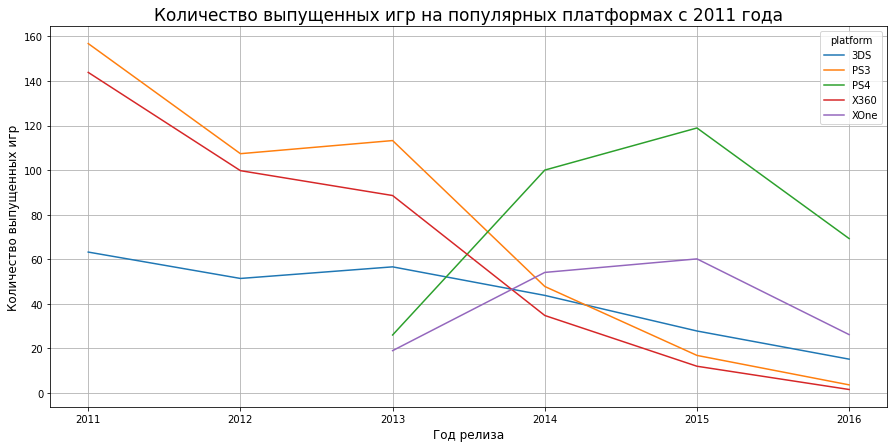

In [25]:
data_with_actual_platform = data.query('platform in ["PS3", "X360", "PS4", "3DS", "XOne"]')
data_with_actual_platform.pivot_table(index='year_of_release', columns = 'platform', values='general_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))

plt.title('Количество выпущенных игр на популярных платформах с 2011 года', size=17)
plt.xlabel('Год релиза', size=12)
plt.ylabel('Количество выпущенных игр', size=12)

plt.show()

Судя по графику, актуальные на 2017 год модели платформ начали появляться в 2013 году. Можно подкоректировать актуальный период и взять с 2013 года, а также оставить три платформы, у которых продажи игр не стремятся к нулю (3DS, PS4, Xbox One). C 2015 года продажи игр на все платформы начали падать. 

In [26]:
data = data.query('2013 <= year_of_release').reset_index(drop=True)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Indef,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Indef,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
5,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Indef,11.68
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
7,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
8,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,Indef,9.18
9,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


#### Продажи игр на актуальных платформах

In [27]:
data.groupby('platform')['general_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


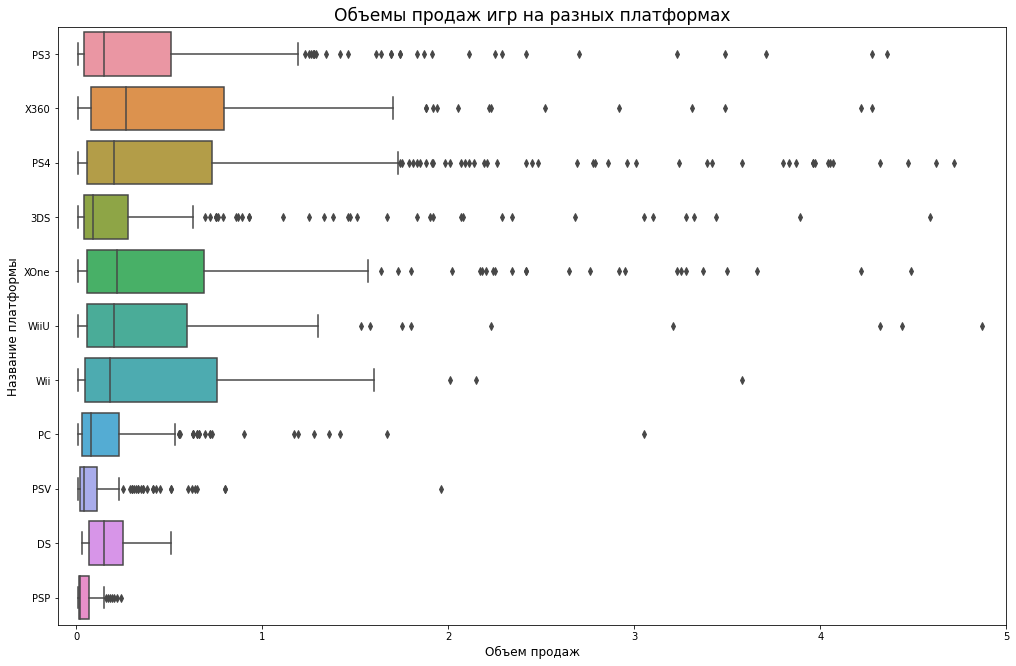

In [28]:
# код ревьюера

import seaborn as sns

plt.figure(figsize=(17, 11))
sns.boxplot(data=data, y='platform', x='general_sales')
plt.xlim(-0.1, 5)

plt.title('Объемы продаж игр на разных платформах', size=17)
plt.xlabel('Объем продаж', size=12)
plt.ylabel('Название платформы', size=12)

plt.show()

Больше всего выделяется Xbox 360 c медианным значением 0.265. Это объяснимо тем, что в 2013 году только вышли новые платформы (Xbox One, PS4). И большая доля продаж игр первое время все равно уходила старым платформам. У PS3 в свою очередь медианное значение равно 0.15.

Также неплохо смотрятся WiiU и Wii c их примерно одинаковым медианным значениям ~0.2. У этих платформ меньше всего выбросов по сравнению с остальными. Возможно, "хитовых" игр для этих платформ выходит не так много. Надо проверить, какой долей продаж они сопровождаются в основных регионах сбыта игр.

PC выглядит не очень перспективным с его медианным значением в 0.08 и небольшой диаграммой размаха.

Видно, что медианное значение 3DS (0.09) значительно отличается от PS4 и Xbox One (0.2 и 0.22 соответственно). Больше всех продаж остается у PS4. Можем наблюдать выбросы, которые могут быть связаны с успехами отдельных игр на каждой из платформ.

Платформы мобильные PS Vita и PSP с 2013 года уже были непопулярны. Это видно по их небольшой диаграмме размаха по сравнению с отсальными.

#### Корреляция между отзывами и продажами игр

Корреляция между продажами и отзывами пользователей для PS4: -0.031957110204556376


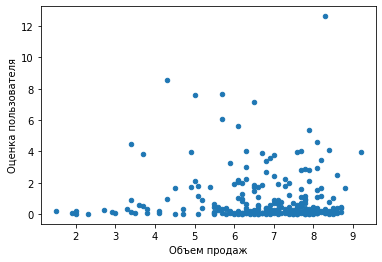

In [29]:
ps4 = data.query('platform == "PS4"')
print(f"Корреляция между продажами и отзывами пользователей для PS4: {ps4['user_score'].corr(ps4['general_sales'])}")
ps4.plot(x='user_score', y='general_sales', kind='scatter')

plt.xlabel('Объем продаж', size=10)
plt.ylabel('Оценка пользователя', size=10)

plt.show()

Корреляция между продажами и отзывами критиков для PS4: 0.40656790206178095


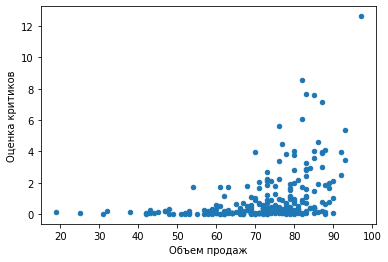

In [30]:
print(f"Корреляция между продажами и отзывами критиков для PS4: {ps4['critic_score'].corr(ps4['general_sales'])}")
ps4.plot(x='critic_score', y='general_sales', kind='scatter')

plt.xlabel('Объем продаж', size=10)
plt.ylabel('Оценка критиков', size=10)

plt.show()

Для популярной платформы PS4 отсутсвтует корреляция между продажами и отзывами пользователей. Есть слабая положительная корреляция ~ 0.4 для продаж и отзывов критиков. Возможно, пользователи PS4 иногда доверяют отзывам критиков, и в соответсвии с их мнением решают, нужна или нет им та или иная игра.

Корреляция между продажами и отзывами пользователей для Xbox One: -0.06892505328279414


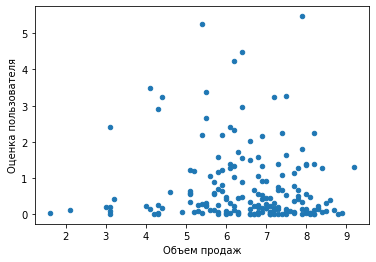

In [31]:
xone = data.query('platform == "XOne"')
print(f"Корреляция между продажами и отзывами пользователей для Xbox One: {xone['user_score'].corr(xone['general_sales'])}")
xone.plot(x='user_score', y='general_sales', kind='scatter')

plt.xlabel('Объем продаж', size=10)
plt.ylabel('Оценка пользователя', size=10)

plt.show()

Корреляция между продажами и отзывами критиков для Xbox One: 0.4169983280084017


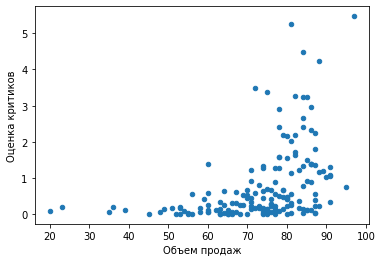

In [32]:
print(f"Корреляция между продажами и отзывами критиков для Xbox One: {xone['critic_score'].corr(xone['general_sales'])}")
xone.plot(x='critic_score', y='general_sales', kind='scatter')

plt.xlabel('Объем продаж', size=10)
plt.ylabel('Оценка критиков', size=10)

plt.show()

Для Xbox One ситуация схожая с PS4. Jтсутсвтует корреляция между продажами и отзывами пользователей. Есть слабая положительная корреляция ~ 0.42 для продаж и отзывов критиков. Возможно, пользователи Xbox One иногда доверяют отзывам критиков, и в соответсвии с их мнением решают, нужна или нет им та или иная игра.

Корреляция между продажами и отзывами пользователей для 3DS: 0.24150411773563016


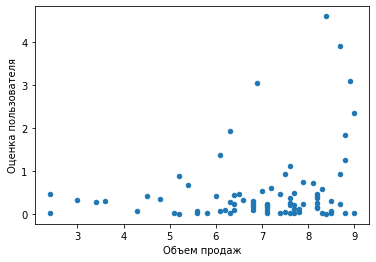

In [33]:
ds3 = data.query('platform == "3DS"')
print(f"Корреляция между продажами и отзывами пользователей для 3DS: {ds3['user_score'].corr(ds3['general_sales'])}")
ds3.plot(x='user_score', y='general_sales', kind='scatter')

plt.xlabel('Объем продаж', size=10)
plt.ylabel('Оценка пользователя', size=10)

plt.show()

Корреляция между продажами и отзывами критиков для 3DS: 0.3570566142288103


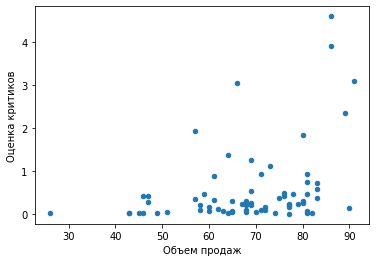

In [34]:
print(f"Корреляция между продажами и отзывами критиков для 3DS: {ds3['critic_score'].corr(ds3['general_sales'])}")
ds3.plot(x='critic_score', y='general_sales', kind='scatter')

plt.xlabel('Объем продаж', size=10)
plt.ylabel('Оценка критиков', size=10)

plt.show()

Для 3DS похожая слабая корреляция между продажами и отзывами критиков (~0.36) с Xbox One и PS4. Однако для 3DS можно говорить о слабо корреляции между продажами и отзывами пользователей ~ 0.24.

**Вывод:** прослеживается слабая положительная корреляция у потенциально прибыльных платформ (Xbox One, PS4, 3DS) между продажами и отзывами пользователей. У 3DS также наблюдается совсем небольшая положительная корреляция между продажами и отзывами пользователей.

Сложно говорить о прямой зависимости продаж от оценок. Но небольшая взаимосвязь между продажами и отзывами пользователей все-таки есть.

#### Общее распределение игр по жанрам

              general_sales
genre                      
Shooter               0.450
Sports                0.240
Platform              0.225
Role-Playing          0.125
Fighting              0.125
Racing                0.120
Action                0.110
Simulation            0.100
Misc                  0.100
Strategy              0.080
Puzzle                0.060
Adventure             0.030


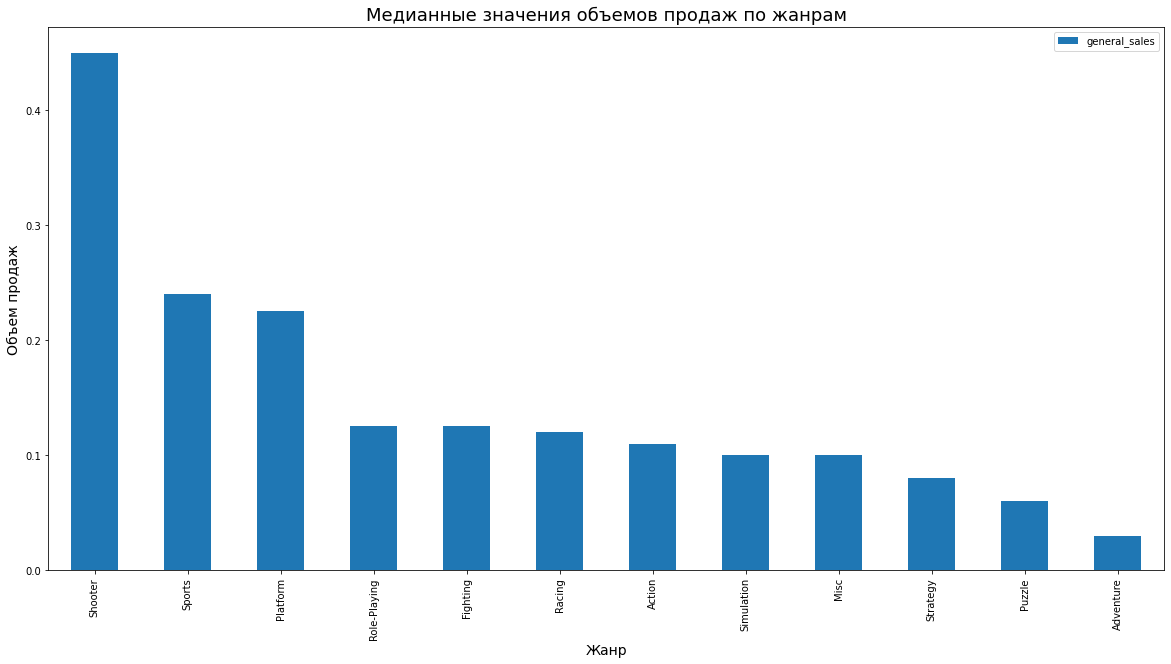

In [35]:
genres_median = data.pivot_table(index='genre', values='general_sales', aggfunc='median').sort_values(by='general_sales', ascending=False)
print(genres_median)
genres_median.plot(use_index=True , y='general_sales', kind='bar', figsize=(20,10))

plt.xlabel('Жанр', size=14)
plt.ylabel('Объем продаж', size=14)
plt.title('Медианные значения объемов продаж по жанрам', size=18)

plt.show()

              name
genre             
Action         766
Role-Playing   292
Adventure      245
Sports         214
Shooter        187
Misc           155
Racing          85
Fighting        80
Platform        74
Simulation      62
Strategy        56
Puzzle          17


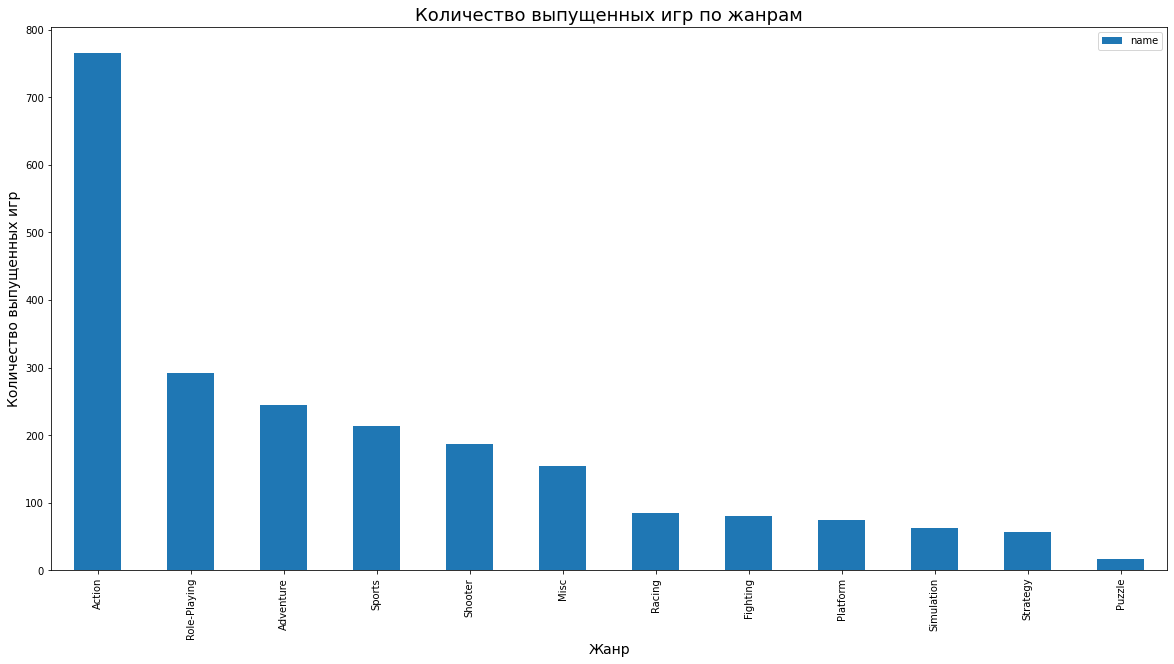

In [36]:
genres_count = data.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False)
print(genres_count)
genres_count.plot(use_index=True , y='name', kind='bar', figsize=(20,10))

plt.xlabel('Жанр', size=14)
plt.ylabel('Количество выпущенных игр', size=14)
plt.title('Количество выпущенных игр по жанрам', size=18)

plt.show()

Тенденция на игры в жанре Action и Shooter явно прослеживается для популярных платформ с 2013 по 2016 года. Аction занимает первое место по количеству выпущенных игр - 766. Этот жанр явно пользуется спросом. Затем идет почти с трехкратным отрывом жанры - Role-Playing, Adventure, Sports. 

Однако в медианных значениях объемов продаж занимает первое место жанр - Shooter (хотя в рейтинге выпущенных игр он на 5 месте). Затем идут с двухкратным отрывом Sports и Platform. На них тоже необходимо обратить внимание. Role-Playing, Fighting, Racing, Action уже по медианному значению занимают меньший объем продаж.

### Портрет пользователя каждого региона

In [37]:
def give_top(ind, val, title):       #функция для составления топов по разным категорияниям и значениям
    top_5 = pd.pivot_table(data, index=ind, values=val, aggfunc='sum').sort_values(val, ascending=False).head()
    print(top_5)
    top_5.plot(use_index=True , y=val, kind='bar', figsize=(15,7), grid=True, title=title)
    plt.ylabel('Объем продаж', size=12)
    plt.show()

#### Самые популярные платформы

          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96


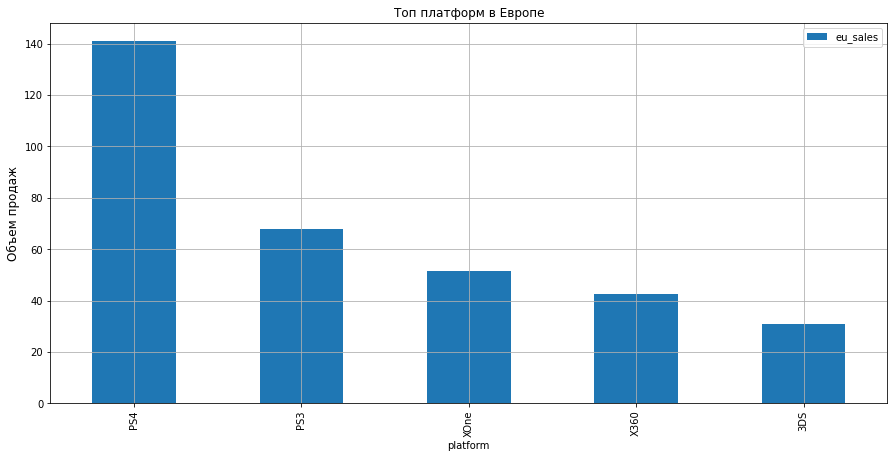

In [38]:
give_top('platform', 'eu_sales', 'Топ платформ в Европе')

          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20


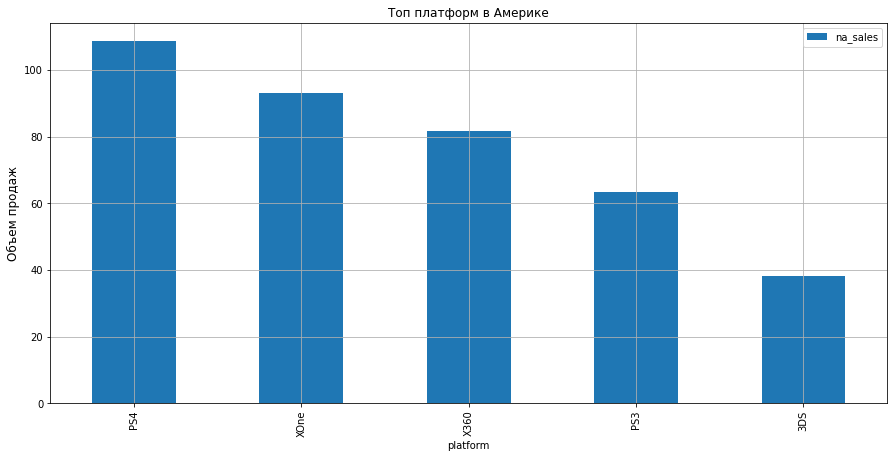

In [39]:
give_top('platform', 'na_sales', 'Топ платформ в Америке')

          jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
WiiU         10.88


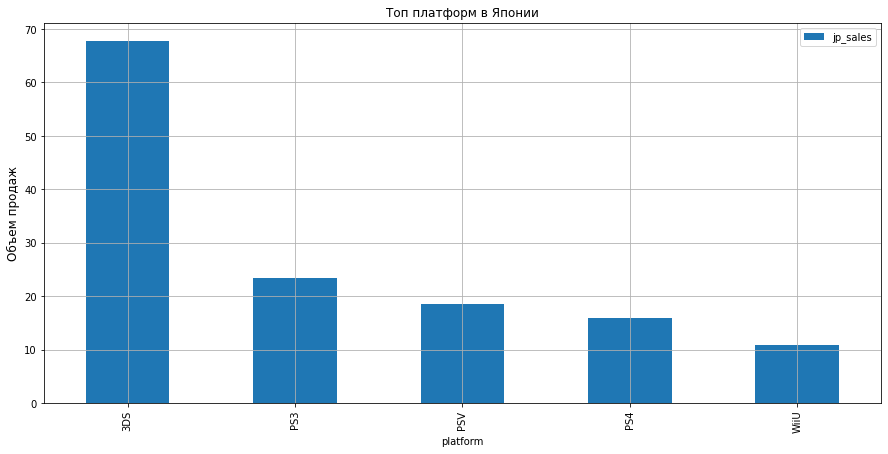

In [40]:
give_top('platform', 'jp_sales', 'Топ платформ в Японии')

**Вывод:**
* В Европе на первых четырех местах платформы игра от мировых брендов Sony и Microsoft - PS4, PS3, Xbox One, Xbox 360. PS4 c отрывом больше, чем в 2 раза от второго места. Лишь на пятом месте 3DS от Nintendo с небольшим отрывом в долях продаж от Xbox360.
* В Америке более плавное распределение между платформами. На первом месте так же PS4 c 108.74 миллионов проданных копий игр. Дальше идет Xbox One, Xbox 360, PS3. И закрывает список так же 3DS от Nintendo.
* В Японии рынок сильно отличается и на первом месте у них 3DS от Nintendo в 67.81 миллионов проданных копий игр. Следующее место занимает PS3 практически с трехкратным отрывом. Затем идет с удивлением PS Vita, которая видимо еще пользуется популярностью в Японии. Закрывает топ в Японии WiiU, которых даже нет в топ5 в Америке и Европе.

#### Самые популярные жанры

              eu_sales
genre                 
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19


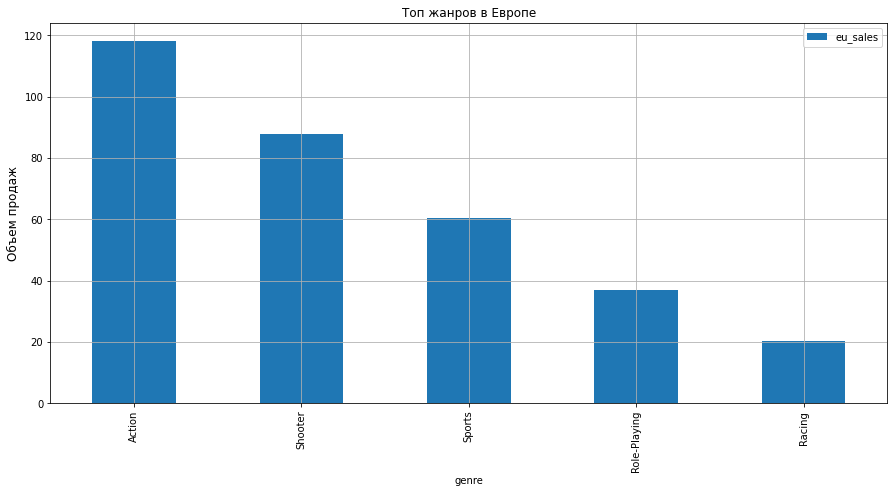

In [41]:
give_top('genre', 'eu_sales', 'Топ жанров в Европе')

              na_sales
genre                 
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49


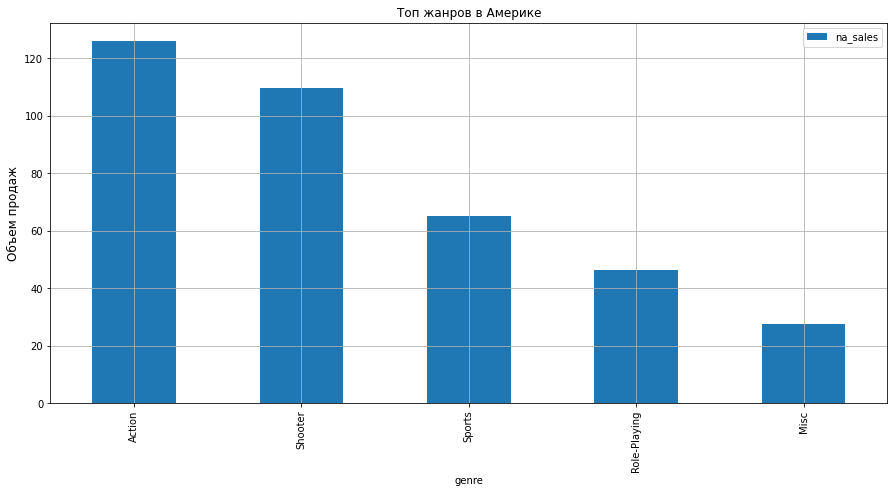

In [42]:
give_top('genre', 'na_sales', 'Топ жанров в Америке')

              jp_sales
genre                 
Role-Playing     51.04
Action           40.49
Misc              9.20
Fighting          7.65
Shooter           6.61


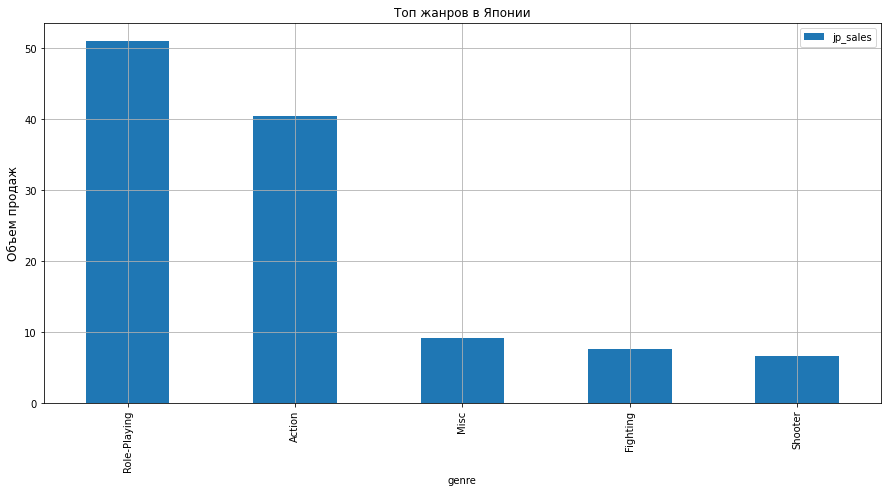

In [43]:
give_top('genre', 'jp_sales', 'Топ жанров в Японии')

**Вывод:**
* В Европе на первых трех местах жанры игр - Action, Shooter, Sports. Затем идет Role-Playing, Racing.
* В Америке первые все места такие же, как и в Европе. Это объяснятся тем, что эти 2 рынка очень схожи по предпочтениям. 
* Рынок Японии как всегда специфичный. Первое место игр занимает Role-Playing. Этот вид игр очень популярен в Японии. На втором месте с 40.49 миллионов копий проданных игр идет Action. За ним Misc, Fighting, Shooter с отрывом больше, чем в 4 раза от 2 места.

#### Рейтинг ESRB

        eu_sales
rating          
M         145.32
E          83.36
Indef      78.91
E10+       42.69
T          41.95


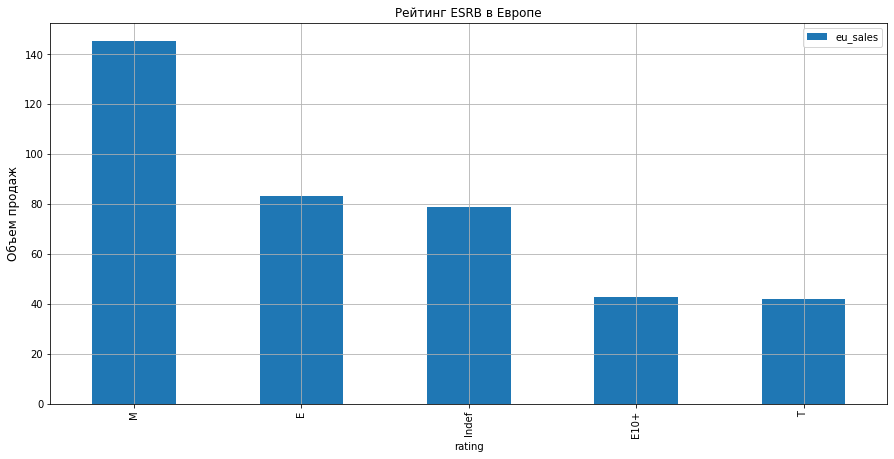

In [44]:
give_top('rating', 'eu_sales', 'Рейтинг ESRB в Европе')

        na_sales
rating          
M         165.21
Indef      89.42
E          79.05
E10+       54.24
T          49.79


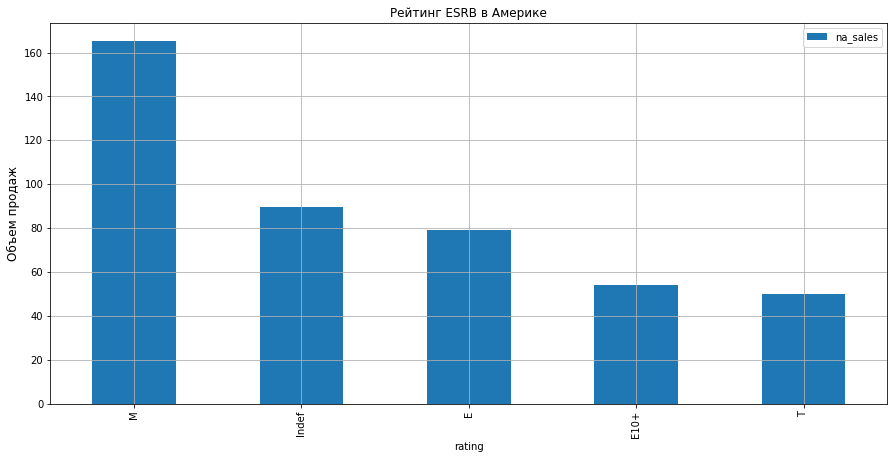

In [45]:
give_top('rating', 'na_sales', 'Рейтинг ESRB в Америке')

        jp_sales
rating          
Indef      85.05
T          20.59
E          15.14
M          14.11
E10+        5.89


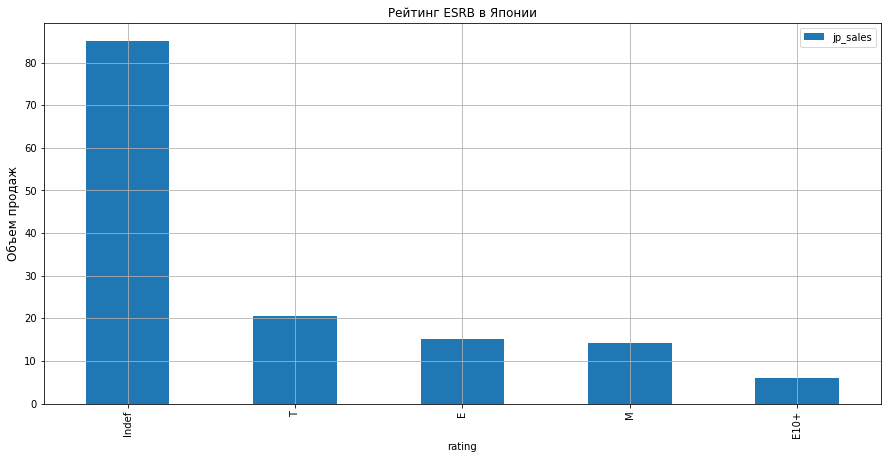

In [46]:
give_top('rating', 'jp_sales', 'Рейтинг ESRB в Японии')

**Вывод:**
* В Европе самые высокие рейтинги у жанра M ("Для взрослых": Материалы игры не подходят для подростков младше 17 лет). На втором месте с достаточным отрывом у жанра E ("Для всех"). Далее по популярности игры, в которых жанры неопределенны. Остальные жанры менее популярные.
* В Америке самые высокие рейтинги у жанра M ("Для взрослых"). Далее по популярности игры, в которых жанры неопределенны. На третьем месте жанр E ("Для всех"). Остальные жанры менее популярные.
* В Японии опять же специфичный рынок. Для подавляющей части игр жанры неопределены. Дальше идут игры "Для подростков", "Для всех" и "Для взрослых".

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверяем гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Выбираем именно этот критерий, потому что у нас две независимые генеральные совокупности. Обычно в нулевой гипотезе говорится о равенстве, поэтому так и формулируем. В альтернативной будет неравенство.

* Н_0: Средние пользовательские рейтинги платформ Xbox One и PC равны.
* Н_а: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

alpha = 0.05

In [47]:
data_xbox_user = data.query('platform == "XOne"')['user_score']
data_pc_user = data.query('platform == "PC"')['user_score']

alpha = .05
results = st.ttest_ind(data_xbox_user, data_pc_user, nan_policy="omit")

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611503
Не получилось отвергнуть нулевую гипотезу


**Вывод:** гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые подтвердилась. Не получилось отвергнуть нулевую гипотезу.

#### Средние пользовательские рейтинги жанров Action и Sports разные

Проверяем гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Выбираем именно этот критерий, потому что у нас две независимые генеральные совокупности. Обычно в нулевой гипотезе говорится о равенстве, поэтому так и формулируем. В альтернативной будет неравенство.

* Н_0: Средние пользовательские рейтинги жанров Action и Sports равны.
* Н_а: Средние пользовательские рейтинги жанров Action и Sports не равны.

alpha = 0.05

In [48]:
data_action_user = data.query('genre == "Action"')['user_score']
data_sports_user = data.query('genre == "Sports"')['user_score']

alpha = .05
results = st.ttest_ind(data_action_user, data_sports_user, nan_policy="omit")

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389139422e-27
Отвергаем нулевую гипотезу


**Вывод:** гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные подтвердилась. Отвергаем нулевую гипотезу в пользу альтернативной, p-значение меньше критическего уровня статистической значимости.

### Общий вывод


В течение исследования сделаны основные шаги предобработки данных - заполнены пропуски, заменены названия столбцов, преобразованы типы данных. Добавлены новые значения в таблицу и проведен исследовательский анализ, проверены гипотезы.

* Большой скачок в количестве игр произошел в 2002 году (около 829 игр, выпущенных за год). Спад идет в 2012 году. Скорее всего это связано с развитием мобильных приложений и игр, которые начали приходить на замену немобильным устройствам.
* Актуальные на данный момент для прогнозирования года с 2013 по 2016. Именно в это время начали появляться и развиваться популярные платформы - PS4 и Xbox One. Сюда можно отнести и 3DS c оговоркой, что он появился гораздо раньше. 
* Больше всего выделяется Xbox 360 c медианным значением 0.265 (объем продаж). Это объяснимо тем, что в 2013 году только вышли новые платформы (Xbox One, PS4). И большая доля продаж игр первое время все равно уходила старым платформам. У PS3 в свою очередь медианное значение равно 0.15. К 2016 году объемы продаж игр пришли практически к нулю у PS3, Xbox 360. Их заменило новое поколение. 
* Медианное значение 3DS (0.09) значительно отличается от PS4 и Xbox One (0.2 и 0.22 соответственно). Можем наблюдать выбросы, которые могут быть связаны с успехами отдельных игр на каждой из платформ.
* Прослеживается слабая положительная корреляция у потенциально прибыльных платформ между продажами и отзывами пользователей.
* Портрет пользователя каждого региона:
1. В Америке самые популярные жанры это Action, Sports, Shooter. Игровые приставки : PS4, Xbox One. По рейтингу игр люди предпочитают игры с рейтингами: "от 17 и выше" и "для всех".
2. В Европе же, популярные жанры точно такие же как и в Америке. Но приставки по предпочитают по следующей очередности: PS4 с большим отрывом от PS3, Xbox One. Рейтинг игр аналогичный Америке.
3. В Японии люди предпочитают игровые приставки: 3DS, PS3, PS Vita. А жанры игры : Role-playing, Action. Для подавляющей части игр жанры неопределены. Дальше идут игры "Для подростков", "Для всех" и "Для взрослых". 
* Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые подтвердилась.
* Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные также подтвердилась.

**Стоит обратить внимание на:**
* игры в жанре Action и Shooter, они пользуется большой популярностью;
* приставку PS4 - распространена по всему миру и актуальна на нынешний период;
* рейтинг игры - "для взрослых" пользуется большой популярностью в Америке и Европе;
* приставку 3DS и жанр Role-playing стоит рассмотреть для Японского рынка, он отличается от всех.